# Introduction to Neural Netwoks and Deep Learning : INNDL_R6_Project1

# bank-customer-churn-modeling

### Set up the Environment - Install and load tensorflow

In [0]:
#Check if tensorFlow is already installed

#!pip list

In [0]:
#Make sure we have the latest version tensorflow 2.x installed

!pip3 install -U tensorflow==2.0 --quiet

In [0]:
#Import tensorflow and check version

import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
#Import executing_eagerly() to execute and evaluate operations immediately, without building graphs

tf.executing_eagerly()

True

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### Import required Python and Skikitlearn libraries

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

### Problem Statement :
### Given a Bank customer, build a classifier that can determine whether they will leave or not using Neural networks

### About the Data:

   **Bank customer churn modeling**

- **Objective:**
Given a Bank’s customer information, can we build a classifier which can
determine whether they will leave or not?
- **Context:**
Businesses like banks which provide service have to worry about problem
of 'Churn' i.e. customers leaving and joining another service provider. It is
important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts
on improvement of service, keeping in mind these priorities.
- **Data Description:**
The dataset contains 10,000 sample points with 14 distinct features such
as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance
etc.

#### Description of The Input Variables
- __RowNumber__          RowId to count number of customers
- __CustomerId__	      Customer Identificaation number, which is unique to each customer
- __Surname__  Surname of customers
- __CreditScore__	  Credit score represents the creditworthiness of a customer
- __Geography__	  Country from which the customer is based
- __Gender__	  Customer's Gender
- __Age__	      Customer's Age
- __Tenure__  Number of years for which a customer is affiliated to the bank, ie, has any kind of account with bank
- __Balance__	 Customer's bank balance
- __NumOfProducts__	 How many accounts, bank account affiliated products the person has
- __HasCrCard__	         Does the customer have a credit card through the bank?
- __IsActiveMember__	             Subjective, but for the concept
- __EstimatedSalary__	         bank's estimation of customer's salary

#### Description of The Target Variables
- __Exited__	        Did the customer leave the bank after all?

## Data Preparartion

### Load Data and read the data as a data frame

In [0]:
#bank_df = pd.read_csv("Churn_Modelling.csv")
bank_df = pd.read_csv('/gdrive/My Drive/AIML/INNDL-Project-1_R6/Churn_Modelling.csv')

### Shape of the data

In [0]:
bank_df.shape

(10000, 14)

### Data type of each attribute

In [0]:
bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Check that data is read correctly using head, tail and sample

In [0]:
bank_df.head(5).T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1


In [0]:
bank_df.tail(5).T

,9995,9996,9997,9998,9999
RowNumber,9996,9997,9998,9999,10000
CustomerId,15606229,15569892,15584532,15682355,15628319
Surname,Obijiaku,Johnstone,Liu,Sabbatini,Walker
CreditScore,771,516,709,772,792
Geography,France,France,France,Germany,France
Gender,Male,Male,Female,Male,Female
Age,39,35,36,42,28
Tenure,5,10,7,3,4
Balance,0,57369.6,0,75075.3,130143
NumOfProducts,2,1,1,2,1


In [0]:
bank_df.sample(5).transpose()

,7114,5182,1383,4298,1145
RowNumber,7115,5183,1384,4299,1146
CustomerId,15575243,15613102,15696637,15680001,15601688
Surname,Gorbunova,Ogochukwu,Sung,McDonald,Piccio
CreditScore,764,670,571,602,546
Geography,France,France,France,France,France
Gender,Female,Female,Female,Male,Male
Age,39,31,23,38,28
Tenure,1,2,10,7,8
Balance,129069,57530.1,151097,111836,0
NumOfProducts,2,1,1,2,1


### Info of columns in the dataset

In [0]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Null Values

In [0]:
bank_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
print("\nThere are no Null/Missing values in the dataset\n")


There are no Null/Missing values in the dataset



### Negative values

In [0]:
(bank_df.drop(['Surname', 'Geography', 'Gender'], axis=1) < 0).sum()

RowNumber          0
CustomerId         0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
print("\nThere are no Negative values in the dataset\n")


There are no Negative values in the dataset



### Duplicated data

In [0]:
bank_df.duplicated().sum()

0

In [0]:
print("\nThere are no duplicate records in the dataset\n")


There are no duplicate records in the dataset



### Dropping the RowNumber, CustomerId and Surname columns

> The RowNumber, CustomerId, Surname columns have no relationship with any of the other features.
> RowNumber only identifies the row number and gives the count of customers.
> CustomerId is the bank's customer identification number.
> Surname is a categorical column with customer surnames.
> So, these columns can be dropped.

In [0]:
bank_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [0]:
#check to see that the RowNumber, CustomerId and Surname columns are dropped

bank_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### numerical columns

- There are 4 numerical features
- 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', though numerical are not continuous variables and having integer values.These features should be considered as ordinal/nominal, which are sub-category of categorical

In [0]:
num_columns = ['CreditScore','Age', 'Balance', 'EstimatedSalary']

### categorical columns

- There are 6 categorical columns
- 'Geography','Gender' are string objects.'Gender' should  be encoded with 0 and 1 as the two categories.Geography can be one-hot encoded
- 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember' are encoded with integer values.

In [0]:
cat_columns  = ['Geography','Gender','Tenure',
               'NumOfProducts', 'HasCrCard', 'IsActiveMember']

### 5 point summary of numerical attributes

In [0]:
bank_df[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


### Observations:
- Mean is very close to Median in CreditScore, Age and EstimatedSalary columns
- Mean is very far from Median in the case of Balance
- All the columns have a different scale and the difference in scales is huge
- The minimum value is zero in Balance column, indicating that some customers do not have a balance in account

### Outliers analysis of numerical columns

In [0]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = bank_df[col].quantile(0.25)
    q3 = bank_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [0]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in num_columns :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(bank_df.loc[(bank_df[col] < lower_limit) | (bank_df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(bank_df.loc[(bank_df[col] < lower_limit) | (bank_df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : CreditScore
 Q1 = 584.0 
 Q3 = 718.0
 IQR = 134.0
 Lower limit = 383.0
 Upper limit = 919.0

15 OUTLIERS ARE PRESENT in CreditScore column.
Outlier datapoints in CreditScore column are:
[376 376 363 359 350 350 358 351 365 367 350 350 382 373 350]

Column name : Age
 Q1 = 32.0 
 Q3 = 44.0
 IQR = 12.0
 Lower limit = 14.0
 Upper limit = 62.0

359 OUTLIERS ARE PRESENT in Age column.
Outlier datapoints in Age column are:
[66 75 65 73 65 72 67 67 79 80 68 75 66 66 70 63 72 64 64 70 67 82 63 69
 65 69 64 65 74 67 66 67 63 70 71 72 67 74 76 66 63 66 68 67 63 71 66 69
 73 65 66 64 69 64 77 74 65 70 67 69 67 74 69 74 74 64 63 63 70 74 65 72
 77 66 65 74 88 63 71 63 64 67 70 68 72 71 66 75 67 73 69 76 63 85 67 74
 76 66 69 66 72 63 71 63 74 67 72 72 66 84 71 66 63 74 69 84 67 64 68 66
 77 70 67 79 67 76 73 66 67 64 73 76 72 64 71 63 70 65 66 65 80 66 63 63
 63 63 66 74 69 63 64 76 75 68 69 77 64 66 74 71 67 68 64 68 70 64 75 66
 64 78 65 74 64 64 71 77 79 70 81 64 68 68 63 79 66 6

### Visualizing Outliers in dataset using boxplot

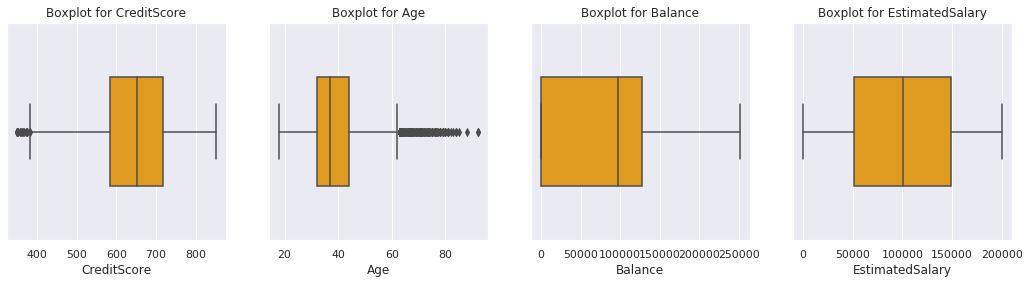

In [0]:
#Visualizing Outliers in dataset using boxplot

fig, ax = plt.subplots(1,4,figsize=(18, 4))
for col,subplot in zip(num_columns,ax.flatten()) :
    sns.boxplot(x=bank_df[[col]], width=0.5, color='orange', ax=subplot)
    subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)    
plt.show()


### Observations on outlier analysis of numerical columns:
- Maximum number of Outliers (359) are present in Age column, CreditScore has very few (15) outliers
- Since the percentage of outliers is very less compared to dataset size, the outliers need not be imputed
- The distributions for Age and Balance columns look to be left skewed

### Variance in numerical columns

In [0]:
bank_df[num_columns].var()

CreditScore        9.341860e+03
Age                1.099941e+02
Balance            3.893436e+09
EstimatedSalary    3.307457e+09
dtype: float64

### Visualizing variance of numerical columns

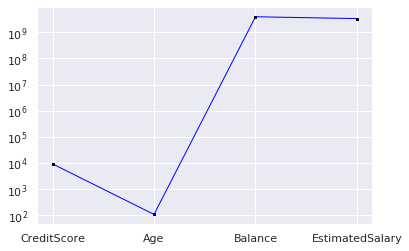

In [0]:
plt.plot(bank_df[num_columns].var(), color='blue', marker='s',mec='black',linewidth=1, markersize=2)
plt.yscale('log')
plt.show()

### Observations on variance of numerical columns
- The above line plot shows the variance values for all the numerical feature columns
- Variance in Balance and EstimatedSalary columns is very high and close to 10^9.CreditScore is in range of 10^4 and Age in 10^2
- A high variance indicates that the data points are more spread out around the mean, ie the spread is more and a low variance indicates that the data points are more close to the mean, ie the spread is less.
- With the variances varying exponentially, it is suggested to scale the column data using any standardization method and Normalize the columns for model building.

## Univariate Analysis

### Visualizing Distribution of numerical columns through distplots

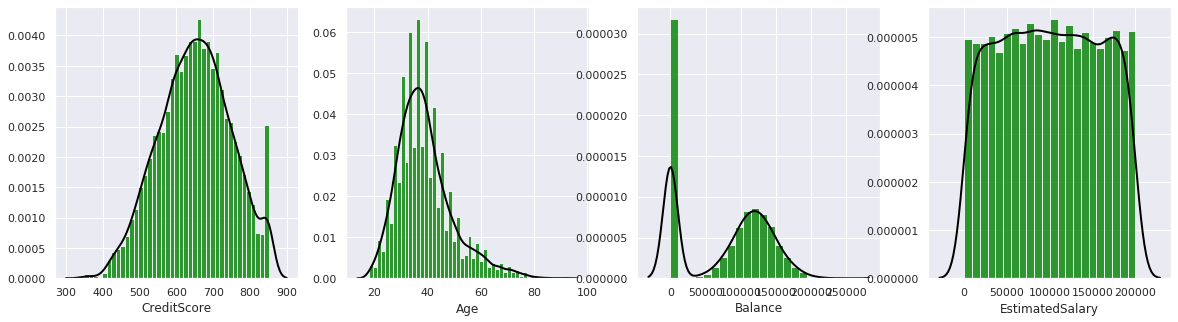

In [0]:
fig, ax = plt.subplots(1,4,figsize=(20, 5))
for col,subplot in zip(num_columns,ax.flatten()) :
    ax =sns.distplot(bank_df[col], ax=subplot, hist_kws={'color':'green','alpha':0.8}, kde_kws={'color':'black', 'lw':2})

### Observations on univariate analysis of numerical columns:
 - The distributions for Age column is approximately right skewed and has long tail
 - EstimatedSalary column has multiple Gaussians in it
 - Two gaussian curves can be seen in CreditScore and Balance columns

### Visualizing value counts of categorical columns through countplot

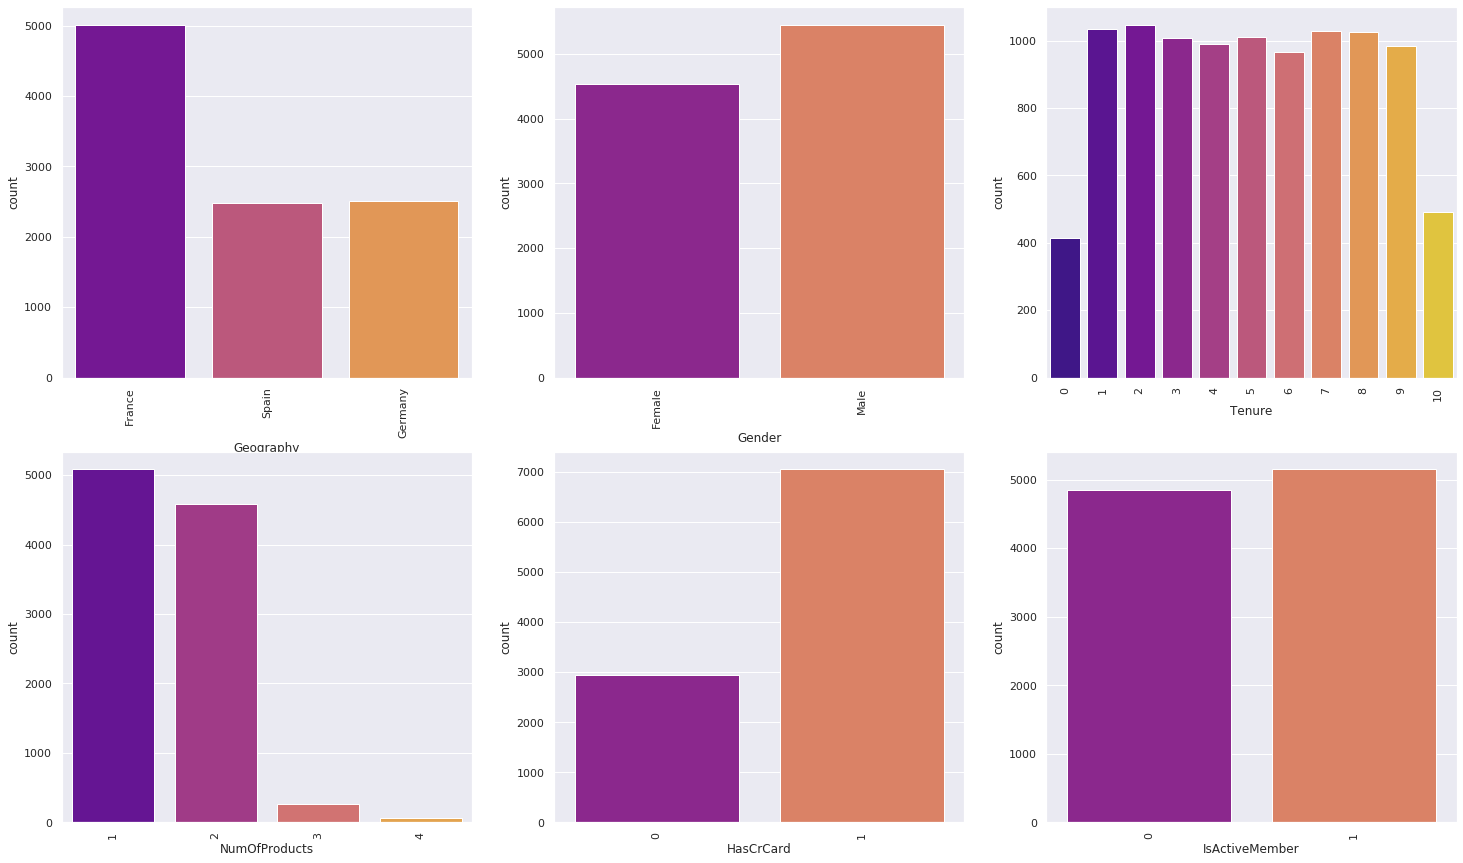

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(25, 15))
for col, subplot in zip(cat_columns, ax.flatten()) :
    sns.countplot(bank_df[col], ax=subplot,palette = 'plasma')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Observations on univariate analysis of categorical columns:
- Maximum number of customers, 5014 are from France, 2509 are from Germany and 2477 are from Spain
- There are more Male customers (5457) than Female customers(4543)
- 1048 customers are affiliated with banks for 2 years which is the highest
- Most of the customers have taken only one product (5084) and very few have taken four products (60)
- Most of the customers have creditcards(7055) and are active(5151)

### Target column distribution

In [0]:
# The Target column is 'Exited'.
# Value counts and distribution of Target column

bank_df.groupby(by='Exited').count()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


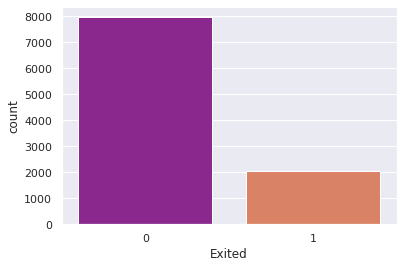

In [0]:
sns.countplot(bank_df['Exited'], palette = 'plasma')
plt.show()

### Observations on value counts of Target column:
1. __A status of '1' refers to a 'Customer has left the bank'.__
2. Among the 10000 customers, only 2037 customers (= 20.4%) have left the bank
3. __A status of '0' refers to a 'Customer did not leave the bank'.__
4. Among the 10000 customers, 7963 customers (= 79.6%) did not leave the bank

## Bivariate Analysis

### Pairplot analysis to visualize the relationship between numerical columns

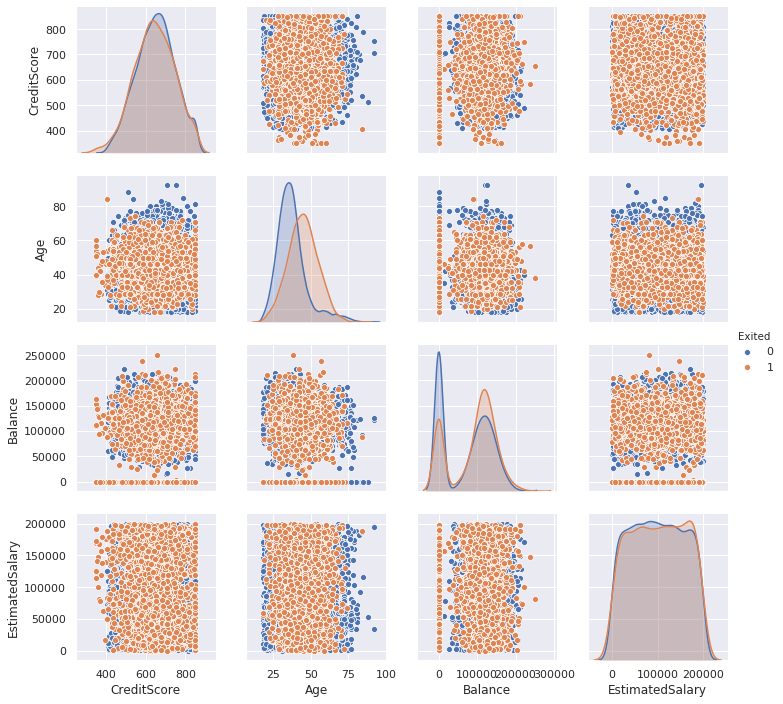

In [0]:
sns.pairplot(vars=bank_df[num_columns],hue='Exited',data=bank_df)
plt.show()

### Observations on bivariate analysis using pairplot:
- The pairplot does not show any relationship between the numerical columns.
- The datpoints are in the form of a cloud in each of the scatter plot and do not tell anything about the relationship among features
- The diagnol KDE plots show overlapping gaussian curves and hence, distinguishing the clusters is difficult
- Two clusters can be significantly identified from the KDE  plots

### Correlation between numerical columns

In [0]:
corr = bank_df[num_columns].corr()
corr.style.background_gradient(cmap='YlGnBu')

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1,-0.00396491,0.00626838,-0.00138429
Age,-0.00396491,1,0.0283084,-0.00720104
Balance,0.00626838,0.0283084,1,0.0127975
EstimatedSalary,-0.00138429,-0.00720104,0.0127975,1


### Visualizing Correlation between numerical columns through Heat map

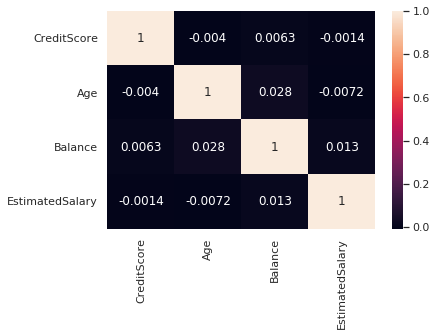

In [0]:
sns.heatmap(corr, annot=True)
plt.show()

### Observations on Correlation between numerical columns:
- Very low correlation values indicate that the numerical features are not correlated
- A low value of 0.028 between Balance and Age, shows that these two features are slightly correlated 

### Barplot analysis to visualize the relationship between categorical columns and Target column

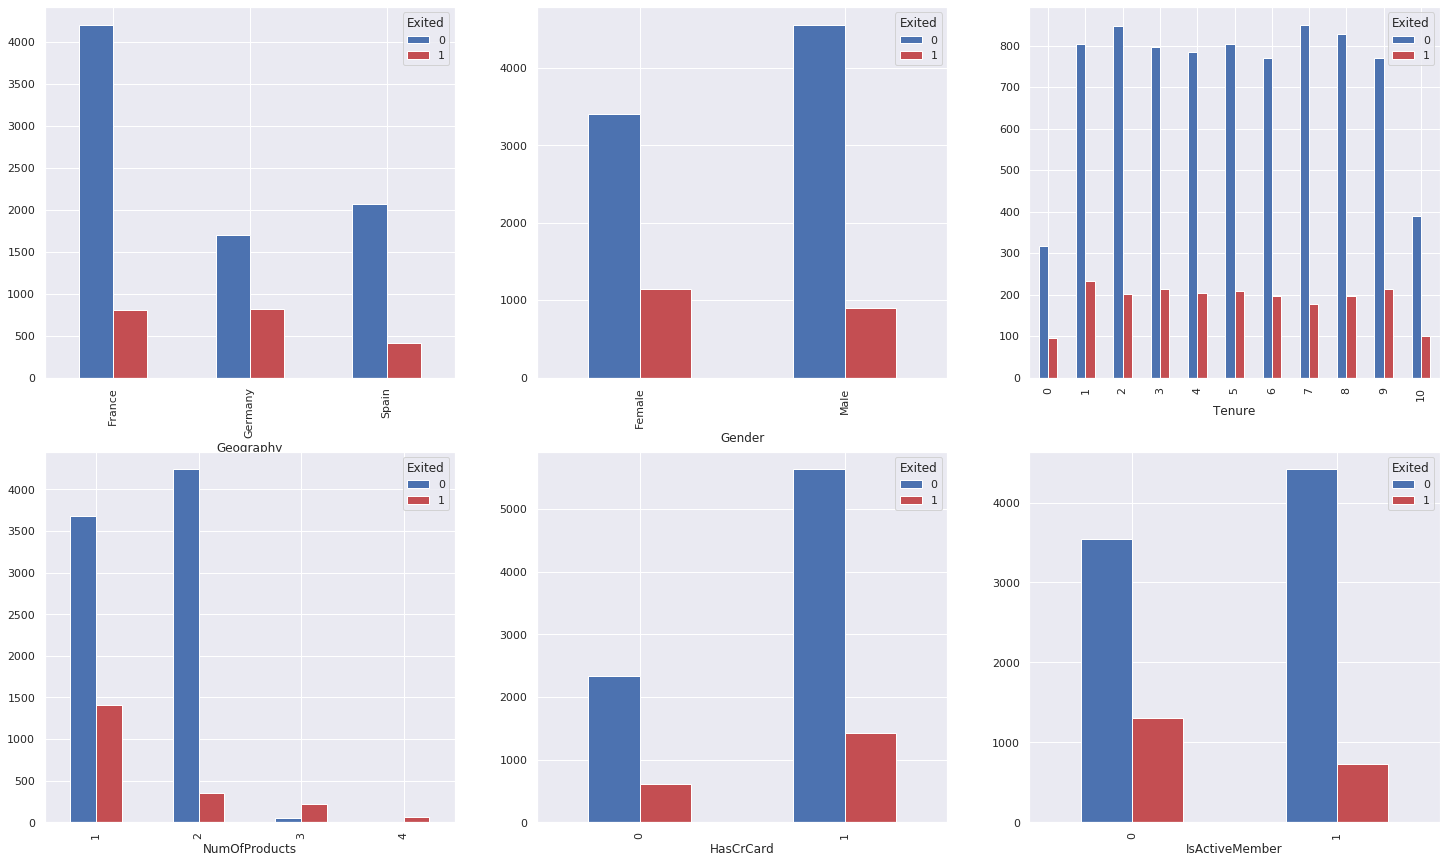

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(25, 15))
for col, subplot in zip(cat_columns, ax.flatten()) :
    pd.crosstab(bank_df[col], bank_df['Exited']).plot(kind='bar',color=('b', 'r'), ax=subplot)

### Observations on barplot analysis of categorical columns:
- Most of the customers who did not leave are Male customers.
- France has highest number of customers who did not leave the bank
- Most of the customers who did not leave have two products with the bank
- All customers who have four products have left and they are very less in number
- Many of the customers who did not leave have a credit card
- Many of the customers who did not leave are active members

## Data Representation - Converting Categorical (string) columns to numeric

In [0]:
#label encoding of 'Gender' column

le = LabelEncoder()
bank_df['Gender'] = le.fit_transform(bank_df['Gender'])
bank_df['Gender'].unique()

array([0, 1])

In [0]:
#One Hot encoding of 'Geography' column
bank_df = pd.get_dummies(data=bank_df, columns=['Geography'], drop_first=True)

In [0]:
bank_df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [0]:
bank_df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [0]:
bank_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


### Distinguish the Dataset into  Featureset - X and Targetset - y

In [0]:
X = bank_df.drop('Exited', axis=1)
y = bank_df['Exited']

In [0]:
print('Shape of Featureset X:{}\nShape of Target y:{}'.format(X.shape, y.shape))

Shape of Featureset X:(10000, 11)
Shape of Target y:(10000,)


## Feature Engineering

In [0]:
#Using Forward, Selection, we can identify what the important features are

logr_clf = LogisticRegression(max_iter=500, random_state=1)
logr_clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
fsel = sfs(logr_clf, k_features=8, forward=True, scoring='roc_auc', cv=5)
fsel.fit(X,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=500,
                                                       multi_class='auto',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=1,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),
  

In [0]:
pd.DataFrame.from_dict(fsel.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.7280343198837324, 0.7307170041383388, 0.744...",0.732148,"(Age,)",0.0110841,0.00862384,0.00431192
2,"(2, 9)","[0.7197614912799289, 0.7461449403882155, 0.755...",0.740918,"(Age, Geography_Germany)",0.0152524,0.0118669,0.00593346
3,"(2, 7, 9)","[0.7681067716031136, 0.755741021282885, 0.7627...",0.755102,"(Age, IsActiveMember, Geography_Germany)",0.0137954,0.0107333,0.00536665
4,"(1, 2, 7, 9)","[0.7758053441225736, 0.7669351660262095, 0.769...",0.762817,"(Gender, Age, IsActiveMember, Geography_Germany)",0.016593,0.0129099,0.00645496
5,"(1, 2, 5, 7, 9)","[0.7776966942555916, 0.766258529165435, 0.7700...",0.763247,"(Gender, Age, NumOfProducts, IsActiveMember, G...",0.0165579,0.0128826,0.00644131
6,"(0, 1, 2, 5, 7, 9)","[0.7778714343777712, 0.7665987720465071, 0.768...",0.763475,"(CreditScore, Gender, Age, NumOfProducts, IsAc...",0.0156787,0.0121985,0.00609926
7,"(0, 1, 2, 3, 5, 7, 9)","[0.778469553650606, 0.7664255714848753, 0.7685...",0.763566,"(CreditScore, Gender, Age, Tenure, NumOfProduc...",0.0155664,0.0121112,0.00605559
8,"(0, 1, 2, 3, 5, 6, 7, 9)","[0.7780754261503597, 0.7662916297172137, 0.768...",0.763521,"(CreditScore, Gender, Age, Tenure, NumOfProduc...",0.0153093,0.0119111,0.00595557


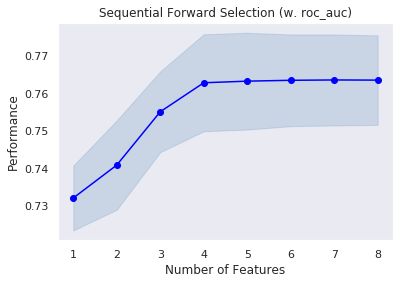

In [0]:
fig = plot_sfs(fsel.get_metric_dict())
plt.title('Sequential Forward Selection (w. roc_auc)')
plt.grid()

In [0]:
fsel.k_feature_idx_

(0, 1, 2, 3, 5, 6, 7, 9)

In [0]:
fsel.k_feature_names_

('CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Geography_Germany')

### Observations:
- Using Forward Selection method we can identify eight important features which are - 'CreditScore','Gender','Age''Tenure','NumOfProducts','HasCrCard','IsActiveMember','Geography_Germany'
- Since none of the features are correlated, almost all the features will be of importance and feature selection methods does not reduce the no of of important features to a very less number

## Build a Neural Networks Classification Model using Keras

### Split the Features and Target into Training dataset and Test dataset

In [0]:
#Use train_test_split method of sklearn.model_selection to split the features and label into train and test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
print("Shape of Training Set:\nFeatures: {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Shape of Test Set:\nFeatures: {0}  Target : {1}".format(X_test.shape, y_test.shape))

Shape of Training Set:
Features: (7000, 11)  Target : (7000,)

Shape of Test Set:
Features: (3000, 11)  Target : (3000,)


### Standardize and Normalize the training dataset and test dataset

- Two features Balance and EstimatedSalary are in the range of 0 to 250000., CeditScore in 350 to 850 and Age 18 to 92
- Since all the features are in a varying scale, it becomes necessary to scale the features such that each of the features  are in the same scale and also normalize them
- For Neural network to understand the relationship between the input features of the training samples and appropriately set the bias and weight of your features, we need to scale the features and also normalize it to obtain more accurate results

In [0]:
#Normalization using Normalizer class of sklearn.preprocessing module

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

### Convert and check that datasets ar numpy arrays

In [0]:
y_train = np.array(y_train)
y_test = np.array(y_test)
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Convert all datasets to float32

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### One-hot encoding of labels to convert them into binary data of 0's and 1's

In [0]:
#Convert to binary data by One-hot encoding using to_categorical

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [0]:
#Input dimensions and output number of classes required to build the models

num_features = X_train.shape[1]
num_classes = 2
print("No of Input Features = {}\nNo of Output classes = {}".format(num_features, num_classes))

#Dataframe to store the model acuuracy to compare model performance
compare_model_acc = pd.DataFrame(index=['Train-Accuracy', 'Train-Loss', 'Val-Accuracy', 'Val-Loss'], 
                                 columns=['Model1-clf1','Model2-clf2','Model3-clf3', 'Model4-clf4', 'Model5-clf5'])

No of Input Features = 11
No of Output classes = 2


## Build a Neural Network Classification Model using Keras API in TensorFlow

### Experiment 1 - Building a Neural Network without hidden layers for 100 epochs and optimizer as sgd

In [0]:
#Initialize Sequential model
clf1 = tf.keras.Sequential()

#Add Dense Layer which provides 11 features as input data 
#and 2 classes as the output after applying softmax to predict probabilities

clf1.add(tf.keras.layers.Dense(num_classes, input_shape=(num_features,), activation='softmax'))

#Compile the model with a cross entropy loss function and sgd optimizer and accuracy as metrics
clf1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Model summary
clf1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Fit the model on X_train,Y_train and validate using X_test,Y_test for 100 epochs for batch size of 32
history_clf1 = clf1.fit(X_train, y_train, batch_size=32,
        validation_data=(X_test, y_test),
        epochs=100)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 122us/sample - loss: 0.5766 - accuracy: 0.7286 - val_loss: 0.5271 - val_accuracy: 0.7803
Epoch 2/100
7000/7000 [==============================] - 0s 60us/sample - loss: 0.4973 - accuracy: 0.7976 - val_loss: 0.4975 - val_accuracy: 0.7910
Epoch 3/100
7000/7000 [==============================] - 0s 56us/sample - loss: 0.4785 - accuracy: 0.7986 - val_loss: 0.4870 - val_accuracy: 0.7910
Epoch 4/100
7000/7000 [==============================] - 0s 58us/sample - loss: 0.4702 - accuracy: 0.7986 - val_loss: 0.4805 - val_accuracy: 0.7910
Epoch 5/100
7000/7000 [==============================] - 0s 56us/sample - loss: 0.4646 - accuracy: 0.7986 - val_loss: 0.4752 - val_accuracy: 0.7910
Epoch 6/100
7000/7000 [==============================] - 0s 56us/sample - loss: 0.4601 - accuracy: 0.7986 - val_loss: 0.4706 - val_accuracy: 0.7910
Epoch 7/100
7000/7000 [==============================] - 0s 55u

#### Inference:
- Without any hidden layers, just by providing the input layer and output layer with softmax function for predicting the probabilities, optimizer as SGD with default learning rate of 0.01, the model is giving an accuracy of 81% for both training and validation sets
- The loss is minimized from 0.6 to 0.4 after training for 100 epochs
- we can try to better the accuracy and minimize the loss by adding hidden layers with an acctivation function to add no-linearity

In [0]:
#get the weights for model
clf1_weights = clf1.get_weights()

In [0]:
#Evaluate the model with trainset
compare_model_acc.loc['Train-Loss','Model1-clf1']=round(clf1.evaluate(X_train, y_train, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Train-Accuracy','Model1-clf1']=round(clf1.evaluate(X_train, y_train, batch_size=32, verbose=0)[1],2)
clf1.evaluate(X_train, y_train, batch_size=32, verbose=0)

[0.4233256814820426, 0.8147143]

In [0]:
#Evaluate the model with testset
compare_model_acc.loc['Val-Loss','Model1-clf1']=round(clf1.evaluate(X_test, y_test, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Val-Accuracy','Model1-clf1']=round(clf1.evaluate(X_test, y_test, batch_size=32, verbose=0)[1],2)
clf1.evaluate(X_test, y_test, batch_size=32, verbose=0)

[0.42752693152427673, 0.81333333]

### Experiment 2 - Building a Neural Network with 3 hidden layers and sigmoid as activation function for 100 epochs and optimizer as sgd

In [0]:
#Initialize Sequential model
clf2 = tf.keras.Sequential()

#Add Dense Layer which provides 11 features as input data and add 1st Hidden layer with 120 Hidden neurons

clf2.add(tf.keras.layers.Dense(120, input_shape=(num_features,), activation='sigmoid'))

#Add 2nd Hidden layer with 60 Hidden neurons
clf2.add(tf.keras.layers.Dense(60, activation='sigmoid'))

#Add 3rd Hidden layer with 12 Hidden neurons
clf2.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add Output layer with 2 classes as the output and apply softmax to predict probabilities
clf2.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

#Compile the model with a cross entropy loss function and sgd optimizer and accuracy as metrics
clf2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Model summary
clf2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               1440      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 9,332
Trainable params: 9,332
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Fit the model on X_train,Y_train and validate using X_test,Y_test for 100 epochs for batch size of 32
history_clf2 = clf2.fit(X_train, y_train, batch_size=32,
        validation_data=(X_test, y_test),
        epochs=100)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 1s 113us/sample - loss: 0.5040 - accuracy: 0.7986 - val_loss: 0.5127 - val_accuracy: 0.7910
Epoch 2/100
7000/7000 [==============================] - 0s 59us/sample - loss: 0.5025 - accuracy: 0.7986 - val_loss: 0.5128 - val_accuracy: 0.7910
Epoch 3/100
7000/7000 [==============================] - 0s 58us/sample - loss: 0.5025 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 4/100
7000/7000 [==============================] - 0s 63us/sample - loss: 0.5025 - accuracy: 0.7986 - val_loss: 0.5126 - val_accuracy: 0.7910
Epoch 5/100
7000/7000 [==============================] - 1s 74us/sample - loss: 0.5024 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 6/100
7000/7000 [==============================] - 0s 70us/sample - loss: 0.5024 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7910
Epoch 7/100
7000/7000 [==============================] - 0s 60u

#### Inference:
- We have added 3 hidden layers with 120, 60 and 10 hidden neurons in each layer and sigmoid as the activation function for each layer before the output layer with softmax function for predicting the probabilities
- With optimizer as SGD with default learning rate of 0.01, the model is giving an accuracy of 79% for both training and validation sets for 100 epochs
- When sigmoid is used as activation function for the hidden layers, the accuracy has decreased and loss is reduced from 0.5 to 0.49, which is less
- This model is bad compared to clf1.We can try to better the accuracy and minimize the loss by increasing hidden layers and increasing the learning rate

In [0]:
#get the weights for model
clf2_weights = clf2.get_weights()

In [0]:
#Evaluate the model with trainset
compare_model_acc.loc['Train-Loss','Model2-clf2']=round(clf2.evaluate(X_train, y_train, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Train-Accuracy','Model2-clf2']=round(clf2.evaluate(X_train, y_train, batch_size=32, verbose=0)[1],2)
clf2.evaluate(X_train, y_train, batch_size=32, verbose=0)

[0.4966696157455444, 0.7985714]

In [0]:
#Evaluate the model with testset
compare_model_acc.loc['Val-Loss','Model2-clf2']=round(clf2.evaluate(X_test, y_test, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Val-Accuracy','Model2-clf2']=round(clf2.evaluate(X_test, y_test, batch_size=32, verbose=0)[1],2)
clf2.evaluate(X_test, y_test, batch_size=32, verbose=0)

[0.5068838959534963, 0.791]

### Experiment 3 - Building a Neural Network by adding 4 hidden layers, using a learning rate of 0.3 for sgd optimizer and increasing number of epochs to 200

In [0]:
#Initialize Sequential model
clf3 = tf.keras.Sequential()

#Add Dense Layer which provides 11 features as input data and add 1st Hidden layer with 250 Hidden neurons
clf3.add(tf.keras.layers.Dense(250, input_shape=(num_features,), activation='sigmoid'))

#Add 2nd Hidden layer with 150 Hidden neurons
clf3.add(tf.keras.layers.Dense(150, input_shape=(num_features,), activation='sigmoid'))

#Add 3rd Hidden layer with 50 Hidden neurons
clf3.add(tf.keras.layers.Dense(50, activation='sigmoid'))

#Add 4th Hidden layer with 10 Hidden neurons
clf3.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add Output layer with 2 classes as the output and apply softmax to predict probabilities
clf3.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

#Change learning_rate of sgd optimizer to 0.03
optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)

#Compile the model with a cross entropy loss function and sgd optimizer and accuracy as metrics
clf3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Model summary
clf3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 250)               3000      
_________________________________________________________________
dense_6 (Dense)              (None, 150)               37650     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 48,732
Trainable params: 48,732
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Fit the model on X_train,Y_train and validate using X_test,Y_test for 200 epochs for batch size of 32
history_clf3 = clf3.fit(X_train, y_train, batch_size=32,
        validation_data=(X_test, y_test),
        epochs=200)

Train on 7000 samples, validate on 3000 samples
Epoch 1/200
7000/7000 [==============================] - 1s 152us/sample - loss: 0.5049 - accuracy: 0.7986 - val_loss: 0.5134 - val_accuracy: 0.7910
Epoch 2/200
7000/7000 [==============================] - 1s 72us/sample - loss: 0.5029 - accuracy: 0.7986 - val_loss: 0.5137 - val_accuracy: 0.7910
Epoch 3/200
7000/7000 [==============================] - 1s 72us/sample - loss: 0.5028 - accuracy: 0.7986 - val_loss: 0.5131 - val_accuracy: 0.7910
Epoch 4/200
7000/7000 [==============================] - 1s 78us/sample - loss: 0.5027 - accuracy: 0.7986 - val_loss: 0.5129 - val_accuracy: 0.7910
Epoch 5/200
7000/7000 [==============================] - 1s 86us/sample - loss: 0.5030 - accuracy: 0.7986 - val_loss: 0.5130 - val_accuracy: 0.7910
Epoch 6/200
7000/7000 [==============================] - 1s 81us/sample - loss: 0.5030 - accuracy: 0.7986 - val_loss: 0.5126 - val_accuracy: 0.7910
Epoch 7/200
7000/7000 [==============================] - 1s 74u

#### Inference:
- We have added 4 hidden layers with 250, 150, 50 and 10 hidden neurons in each layer and sigmoid as the activation function for each layer before the output layer with softmax function for predicting the probabilities and increased the number of epochs to 200
- With optimizer as SGD and learning rate increased to 0.03, the model is giving an accuracy of 80% for both training and validation sets for 200 epochs
- Sigmoid is used as activation function for the hidden layers, and the accuracy has improved from clf2 model and loss is reduced from 0.51 to 0.49
- This model is still not better compared to clf1 which has given 81% accuaracy. We can try to better the accuracy and minimize the loss by changing the activation function

In [0]:
#get the weights for model
clf3_weights = clf3.get_weights()

In [0]:
#Evaluate the model with trainset
compare_model_acc.loc['Train-Loss','Model3-clf3']=round(clf3.evaluate(X_train, y_train, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Train-Accuracy','Model3-clf3']=round(clf3.evaluate(X_train, y_train, batch_size=32, verbose=0)[1],2)
clf3.evaluate(X_train, y_train, batch_size=32, verbose=0)

[0.490344758783068, 0.7985714]

In [0]:
#Evaluate the model with testset
compare_model_acc.loc['Val-Loss','Model3-clf3']=round(clf3.evaluate(X_test, y_test, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Val-Accuracy','Model3-clf3']=round(clf3.evaluate(X_test, y_test, batch_size=32, verbose=0)[1],2)
clf3.evaluate(X_test, y_test, batch_size=32, verbose=0)

[0.5005311708450317, 0.791]

### Experiment 4 - Building a Neural Network by changing activation function to relu (Rectified Linear Unit),  with 4 hidden layers, using a learning rate of 0.01 for sgd optimizer and reducing number of epochs to 30

In [0]:
#Initialize Sequential model
clf4 = tf.keras.Sequential()

#Add Dense Layer which provides 11 features as input data and add 1st Hidden layer with 250 Hidden neurons
clf4.add(tf.keras.layers.Dense(250, input_shape=(num_features,), activation='relu'))

#Add 2nd Hidden layer with 150 Hidden neurons
clf4.add(tf.keras.layers.Dense(150, input_shape=(num_features,), activation='relu'))

#Add 3rd Hidden layer with 50 Hidden neurons
clf4.add(tf.keras.layers.Dense(50, activation='relu'))

#Add 4th Hidden layer with 10 Hidden neurons
clf4.add(tf.keras.layers.Dense(10, activation='relu'))

#Add Output layer with 2 classes as the output and apply softmax to predict probabilities
clf4.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


#Compile the model with a cross entropy loss function and sgd optimizer and accuracy as metrics
clf4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Model summary
clf4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 250)               3000      
_________________________________________________________________
dense_11 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 22        
Total params: 48,732
Trainable params: 48,732
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Fit the model on X_train,Y_train and validate using X_test,Y_test for 30 epochs for batch size of 32
history_clf4 = clf4.fit(X_train, y_train, batch_size=32,
        validation_data=(X_test, y_test),
        epochs=30)

Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 [==============================] - 1s 139us/sample - loss: 0.5562 - accuracy: 0.7816 - val_loss: 0.5101 - val_accuracy: 0.7910
Epoch 2/30
7000/7000 [==============================] - 1s 82us/sample - loss: 0.4958 - accuracy: 0.7986 - val_loss: 0.5002 - val_accuracy: 0.7910
Epoch 3/30
7000/7000 [==============================] - 1s 76us/sample - loss: 0.4819 - accuracy: 0.7986 - val_loss: 0.4787 - val_accuracy: 0.7910
Epoch 4/30
7000/7000 [==============================] - 1s 82us/sample - loss: 0.4604 - accuracy: 0.7986 - val_loss: 0.4583 - val_accuracy: 0.7910
Epoch 5/30
7000/7000 [==============================] - 1s 75us/sample - loss: 0.4406 - accuracy: 0.8003 - val_loss: 0.4372 - val_accuracy: 0.8030
Epoch 6/30
7000/7000 [==============================] - 1s 76us/sample - loss: 0.4253 - accuracy: 0.8129 - val_loss: 0.4242 - val_accuracy: 0.8137
Epoch 7/30
7000/7000 [==============================] - 1s 75us/sampl

#### Inference:
- We have added 4 hidden layers with 250, 150, 50 and 10 hidden neurons in each layer and relu (Rectified Linear Unit) as the activation function for each layer before the output layer with softmax function for predicting the probabilities and reduced the number of epochs to 30
- With optimizer as SGD and learning rate of 0.01(default), the model is giving an accuracy of 86.1% for trainingset and 85.9% for validation set
- When relu is used as activation function for the hidden layers, the accuracy has increased from clf3 model and there is a good loss minimization from 0.50 to 0.35
- This model is performing well, with good accuarcy , loss minimized and also the model is not overfit or underfit. We can try to get better accuracy by changing  number of hidden layers/neurons
- We can say that for this datset, relu is a better activation function than sigmoid

In [0]:
#get the weights for model
clf4_weights = clf4.get_weights()

In [0]:
#Evaluate the model with trainset
compare_model_acc.loc['Train-Loss','Model4-clf4']=round(clf4.evaluate(X_train, y_train, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Train-Accuracy','Model4-clf4']=round(clf4.evaluate(X_train, y_train, batch_size=32, verbose=0)[1],2)
clf4.evaluate(X_train, y_train, batch_size=32, verbose=0)

[0.33017196226119994, 0.8618571]

In [0]:
#Evaluate the model with testset
compare_model_acc.loc['Val-Loss','Model4-clf4']=round(clf4.evaluate(X_test, y_test, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Val-Accuracy','Model4-clf4']=round(clf4.evaluate(X_test, y_test, batch_size=32, verbose=0)[1],2)
clf4.evaluate(X_test, y_test, batch_size=32, verbose=0)

[0.3499355843067169, 0.85933334]

### Experiment 5 - Building a Neural Network by using relu (Rectified Linear Unit) as activation function,  with 4 hidden layers, learning rate of 0.03 for sgd optimizer and  number of epochs as 30

In [0]:
#Initialize Sequential model
clf5 = tf.keras.Sequential()

#Add Dense Layer which provides 11 features as input data and add 1st Hidden layer with 200 Hidden neurons
clf5.add(tf.keras.layers.Dense(200, input_shape=(num_features,), activation='relu'))

#Add 2nd Hidden layer with 100 Hidden neurons
clf5.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd Hidden layer with 50 Hidden neurons
clf5.add(tf.keras.layers.Dense(50, activation='relu'))

#Add 4th Hidden layer with 5 Hidden neurons
clf5.add(tf.keras.layers.Dense(5, activation='relu'))

#Add Output layer with 2 classes as the output and apply softmax to predict probabilities
clf5.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

#Change learning_rate of sgd optimizer to 0.03
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

#Compile the model with a cross entropy loss function and sgd optimizer and accuracy as metrics
clf5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Model summary
clf5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 200)               2400      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 12        
Total params: 27,817
Trainable params: 27,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Fit the model on X_train,Y_train and validate using X_test,Y_test for 30 epochs for batch size of 32
history_clf5 = clf5.fit(X_train, y_train, batch_size=32,
        validation_data=(X_test, y_test),
        epochs=30)

Train on 7000 samples, validate on 3000 samples
Epoch 1/30
7000/7000 [==============================] - 1s 135us/sample - loss: 0.5095 - accuracy: 0.7977 - val_loss: 0.4879 - val_accuracy: 0.7910
Epoch 2/30
7000/7000 [==============================] - 1s 73us/sample - loss: 0.4592 - accuracy: 0.7986 - val_loss: 0.4469 - val_accuracy: 0.7910
Epoch 3/30
7000/7000 [==============================] - 0s 69us/sample - loss: 0.4249 - accuracy: 0.8070 - val_loss: 0.4221 - val_accuracy: 0.8153
Epoch 4/30
7000/7000 [==============================] - 0s 71us/sample - loss: 0.4096 - accuracy: 0.8203 - val_loss: 0.4115 - val_accuracy: 0.8217
Epoch 5/30
7000/7000 [==============================] - 0s 67us/sample - loss: 0.4003 - accuracy: 0.8284 - val_loss: 0.4096 - val_accuracy: 0.8220
Epoch 6/30
7000/7000 [==============================] - 0s 66us/sample - loss: 0.3909 - accuracy: 0.8341 - val_loss: 0.3906 - val_accuracy: 0.8403
Epoch 7/30
7000/7000 [==============================] - 0s 71us/sampl

#### Inference:
- We have added 4 hidden layers with 200, 100, 50 and 10 hidden neurons in each layer and relu (Rectified Linear Unit) as the activation function for each layer before the output layer with softmax function for predicting the probabilities and  number of epochs as 30
- With optimizer as SGD and learning rate of 0.02, the model is giving an accuracy of 86.6% for trainingset and 85.9% for validation set
- When relu is used as activation function for the hidden layers, the accuracy has increased from clf4 model and there is a good loss minimization from 0.48 to 0.35
- This model is performing well, with good accuarcy, loss minimized and also the model is not overfit or underfit. We can can use this as the best model for prediction
- We can say that for this datset, relu is a better activation function than sigmoid, by usig sgd as optimizer with 0.02 learning rate, we are getting a good accuracy

In [0]:
#get the weights for model
clf5_weights = clf5.get_weights()

In [0]:
#Evaluate the model with trainset
compare_model_acc.loc['Train-Loss','Model5-clf5']=round(clf5.evaluate(X_train, y_train, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Train-Accuracy','Model5-clf5']=round(clf5.evaluate(X_train, y_train, batch_size=32, verbose=0)[1],2)
clf5.evaluate(X_train, y_train, batch_size=32, verbose=0)

[0.31666964673995973, 0.86914283]

In [0]:
#Evaluate the model with testset
compare_model_acc.loc['Val-Loss','Model5-clf5']=round(clf5.evaluate(X_test, y_test, batch_size=32, verbose=0)[0],2)
compare_model_acc.loc['Val-Accuracy','Model5-clf5']=round(clf5.evaluate(X_test, y_test, batch_size=32, verbose=0)[1],2)
clf5.evaluate(X_test, y_test, batch_size=32, verbose=0)

[0.34532166775067646, 0.85933334]

### Predict the classes using above model - clf5 and compare with Testset

In [0]:
#Prdict he probability percentages for each row and the classes which were predicted using above model
y_predict = clf5.predict(X_test, batch_size=32)
y_predict_prob = clf5.predict_proba(X_test, batch_size=32)
y_predict_classes = clf5.predict_classes(X_test)

In [0]:
#Predicted Probabilities
#first 10 outputs

y_predict[0:10]

array([[0.9172853 , 0.08271475],
       [0.88176036, 0.11823966],
       [0.8018914 , 0.1981086 ],
       [0.90703636, 0.09296364],
       [0.8077839 , 0.19221608],
       [0.974532  , 0.02546798],
       [0.74477977, 0.2552202 ],
       [0.9557231 , 0.04427692],
       [0.7677101 , 0.23228985],
       [0.970089  , 0.02991101]], dtype=float32)

In [0]:
# Predicted Probabilities for binary class prediction, which will be same as predited probabilities
#first 10 outputs

y_predict_prob[0:10]

array([[0.9172853 , 0.08271475],
       [0.88176036, 0.11823966],
       [0.8018914 , 0.1981086 ],
       [0.90703636, 0.09296364],
       [0.8077839 , 0.19221608],
       [0.974532  , 0.02546798],
       [0.74477977, 0.2552202 ],
       [0.9557231 , 0.04427692],
       [0.7677101 , 0.23228985],
       [0.970089  , 0.02991101]], dtype=float32)

In [0]:
#Predicted classes from y_predict_classes
#first 10 outputs

y_predict_classes[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
#Actual classes from y_test

In [0]:
np.argmax(y_test[0:10], axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Confusion Matrix and Classification Report using above model - clf5

In [0]:
#Convert the test labels - y_test back from binary(0 and 1) to original values
y_true = np.argmax(y_test, axis=-1)

In [0]:
#accuracy score
accuracy_score(y_true, y_predict_classes)

0.8593333333333333

In [0]:
#precision-score
precision_score(y_true, y_predict_classes)

0.7079107505070994

In [0]:
#recall-score
recall_score(y_true, y_predict_classes)

0.5566188197767146

In [0]:
#f1_score
f1_score(y_true, y_predict_classes)

0.6232142857142857

In [0]:
confusion_matrix = confusion_matrix(y_true, y_predict_classes)
print(confusion_matrix)

[[2229  144]
 [ 278  349]]


In [0]:
print(classification_report(y_true, y_predict_classes))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2373
           1       0.71      0.56      0.62       627

    accuracy                           0.86      3000
   macro avg       0.80      0.75      0.77      3000
weighted avg       0.85      0.86      0.85      3000



### Inference:
- The accuracy score on testset is 86% and the precision score is 89%, which is a good accuracy
- But, the recall score is only 56% and hence the f1_score is also less with only 62%
- This low recall score is because, the dataset is imbalanced with the labels/traget skewed towards only one value '0'
- Because of the imbalance in dataset, the confusion matrix also shows very high number of True Positives (2229) and very less number of false positives (144)
- To counter the imbalance in the dataset, we have to use resampling methods and either increase the minority class or reduce the majority class

### Comparision of  Model Performance of the five models by visualizing accuracies over no of epochs

In [0]:
compare_model_acc

,Model1-clf1,Model2-clf2,Model3-clf3,Model4-clf4,Model5-clf5
Train-Accuracy,0.81,0.8,0.8,0.86,0.87
Train-Loss,0.42,0.5,0.49,0.33,0.32
Val-Accuracy,0.81,0.79,0.79,0.86,0.86
Val-Loss,0.43,0.51,0.5,0.35,0.35


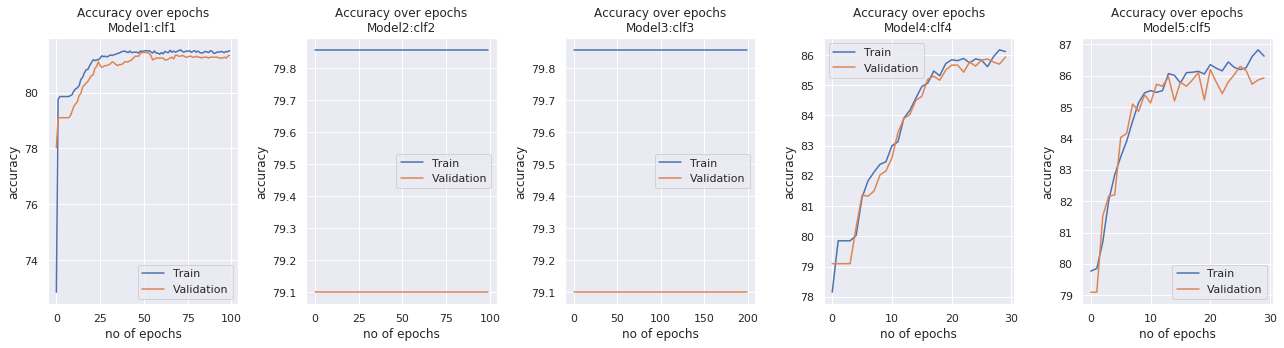

In [0]:
hist_cols = [history_clf1, history_clf2, history_clf3, history_clf4, history_clf5]
models = ['Model1:clf1','Model2:clf2','Model3:clf3','Model4:clf4','Model5:clf5']
i=0
fig, ax = plt.subplots(1, 5, figsize=(18, 5))
for col, subplot in zip(hist_cols, ax.flatten()) :    
    #plt.plot(np.array(col.history['accuracy']) * 100)
    subplot.plot(np.array(col.history['accuracy']) * 100)
    #plt.plot(np.array(col.history['val_accuracy']) * 100)
    subplot.plot(np.array(col.history['val_accuracy']) * 100)
    #plt.ylabel('accuracy')
    subplot.set_ylabel('accuracy')
    #plt.xlabel('no of epochs')
    subplot.set_xlabel('no of epochs')
    #plt.legend(['Train', 'Validation'])
    subplot.legend(['Train', 'Validation'])
    #plt.title('Accuracy over epochs')
    subplot.set_title('Accuracy over epochs\n{}'.format(models[i]))
    i=i+1
    #plt.show()
plt.tight_layout()
plt.show()

#### Observations:
- Plot of accuracy of training and validation sets for all the five models, shows that the model accuracy for training and validation sets is the best for models clf4 and clf5
- plot for clf1 shows that the learning is not constantly increasing over epochs and the accuracy is varying a lot
- plots for clf2 and clf3 is showing that the learning is constant and neither the loss is minimizing no the accuaracy is increasing over tne number of epochs.So these two models can be discarded.
- plots for clf4 and clf5 clearly show that the learning is increasing, which means that the loss is minimizing at a faster rate and accuracy is increasing over the no of epochs.So, these two models should be retained.